In [16]:
#importing the basis Libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [3]:
print(df.head())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None


In [7]:
# Count missing values in each column
print(df.isnull().sum())


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


target
1    629
0    561
Name: count, dtype: int64


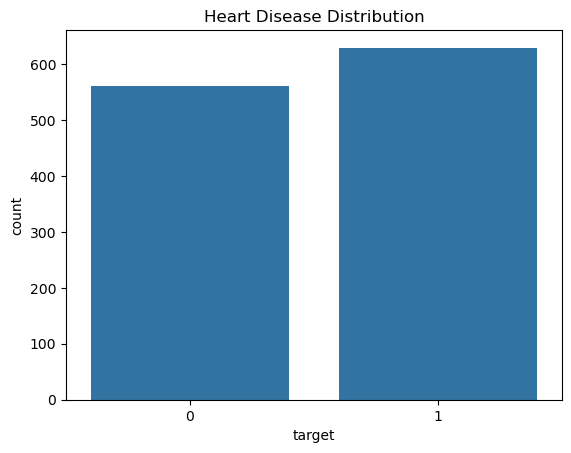

In [8]:
# Count of heart disease presence vs absence
print(df['target'].value_counts())

# Visualize class distribution
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()


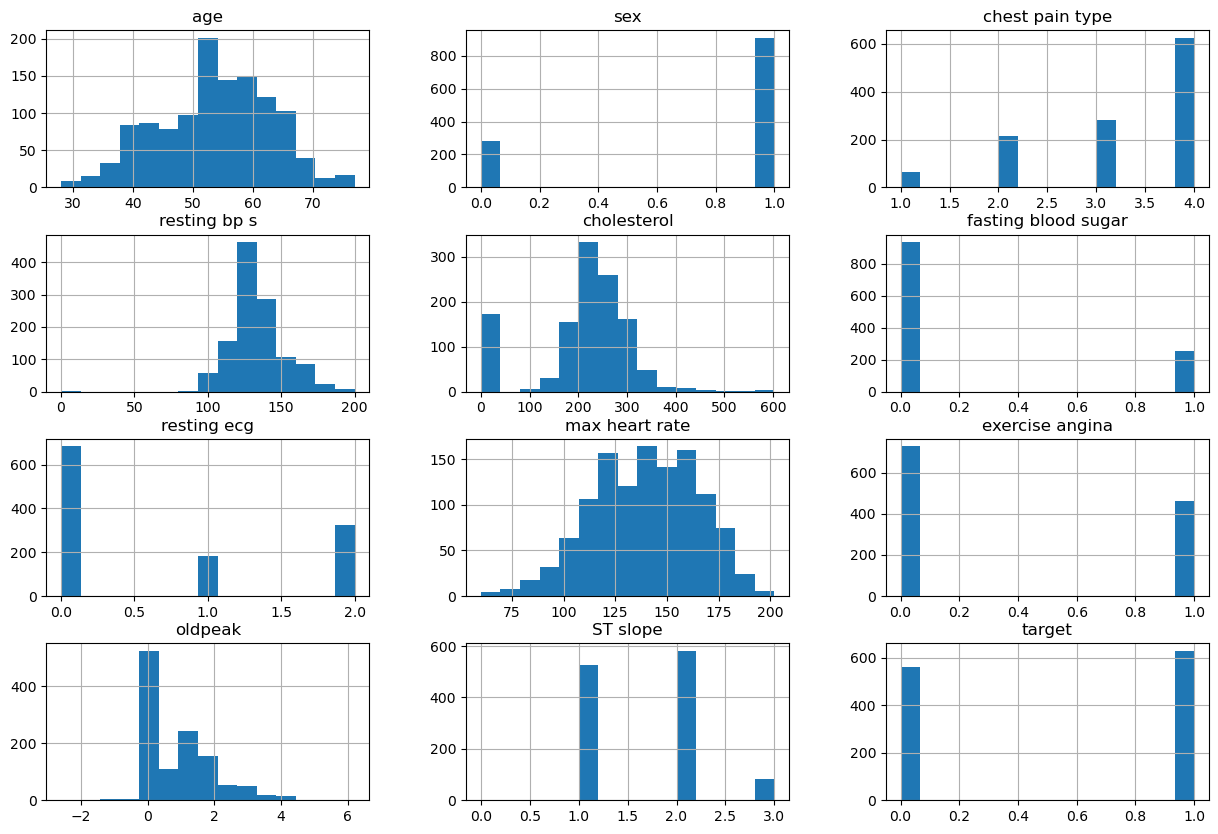

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols].hist(bins=15, figsize=(15,10))
plt.show()


In [10]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()


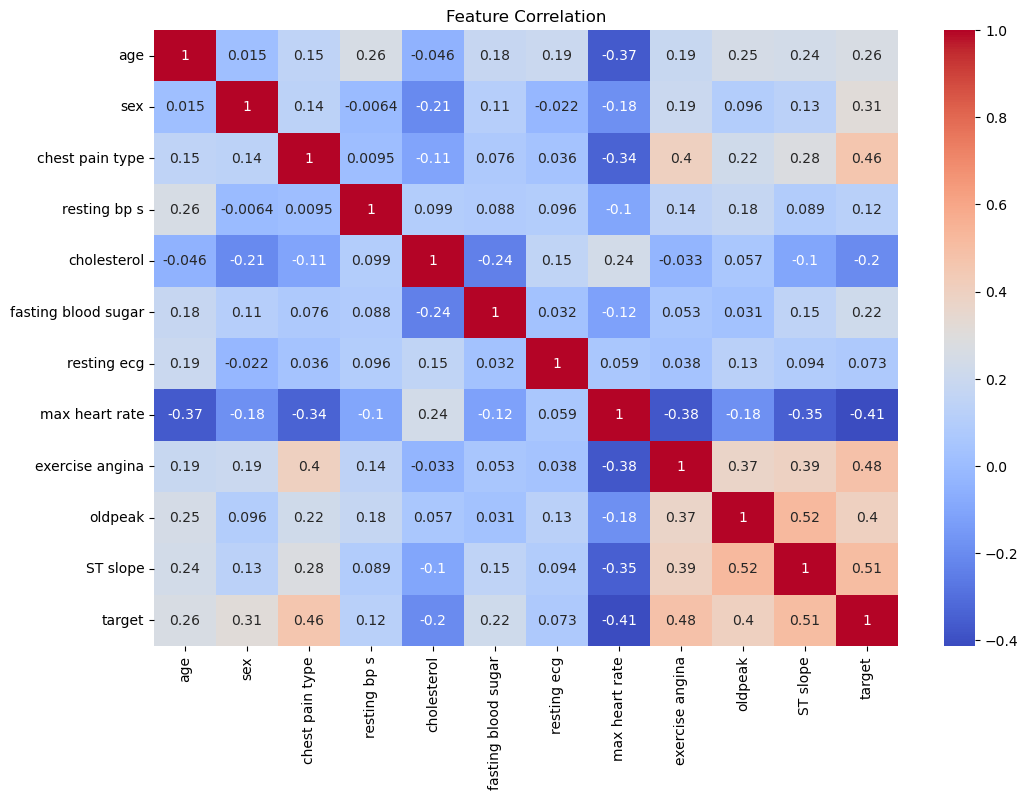

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


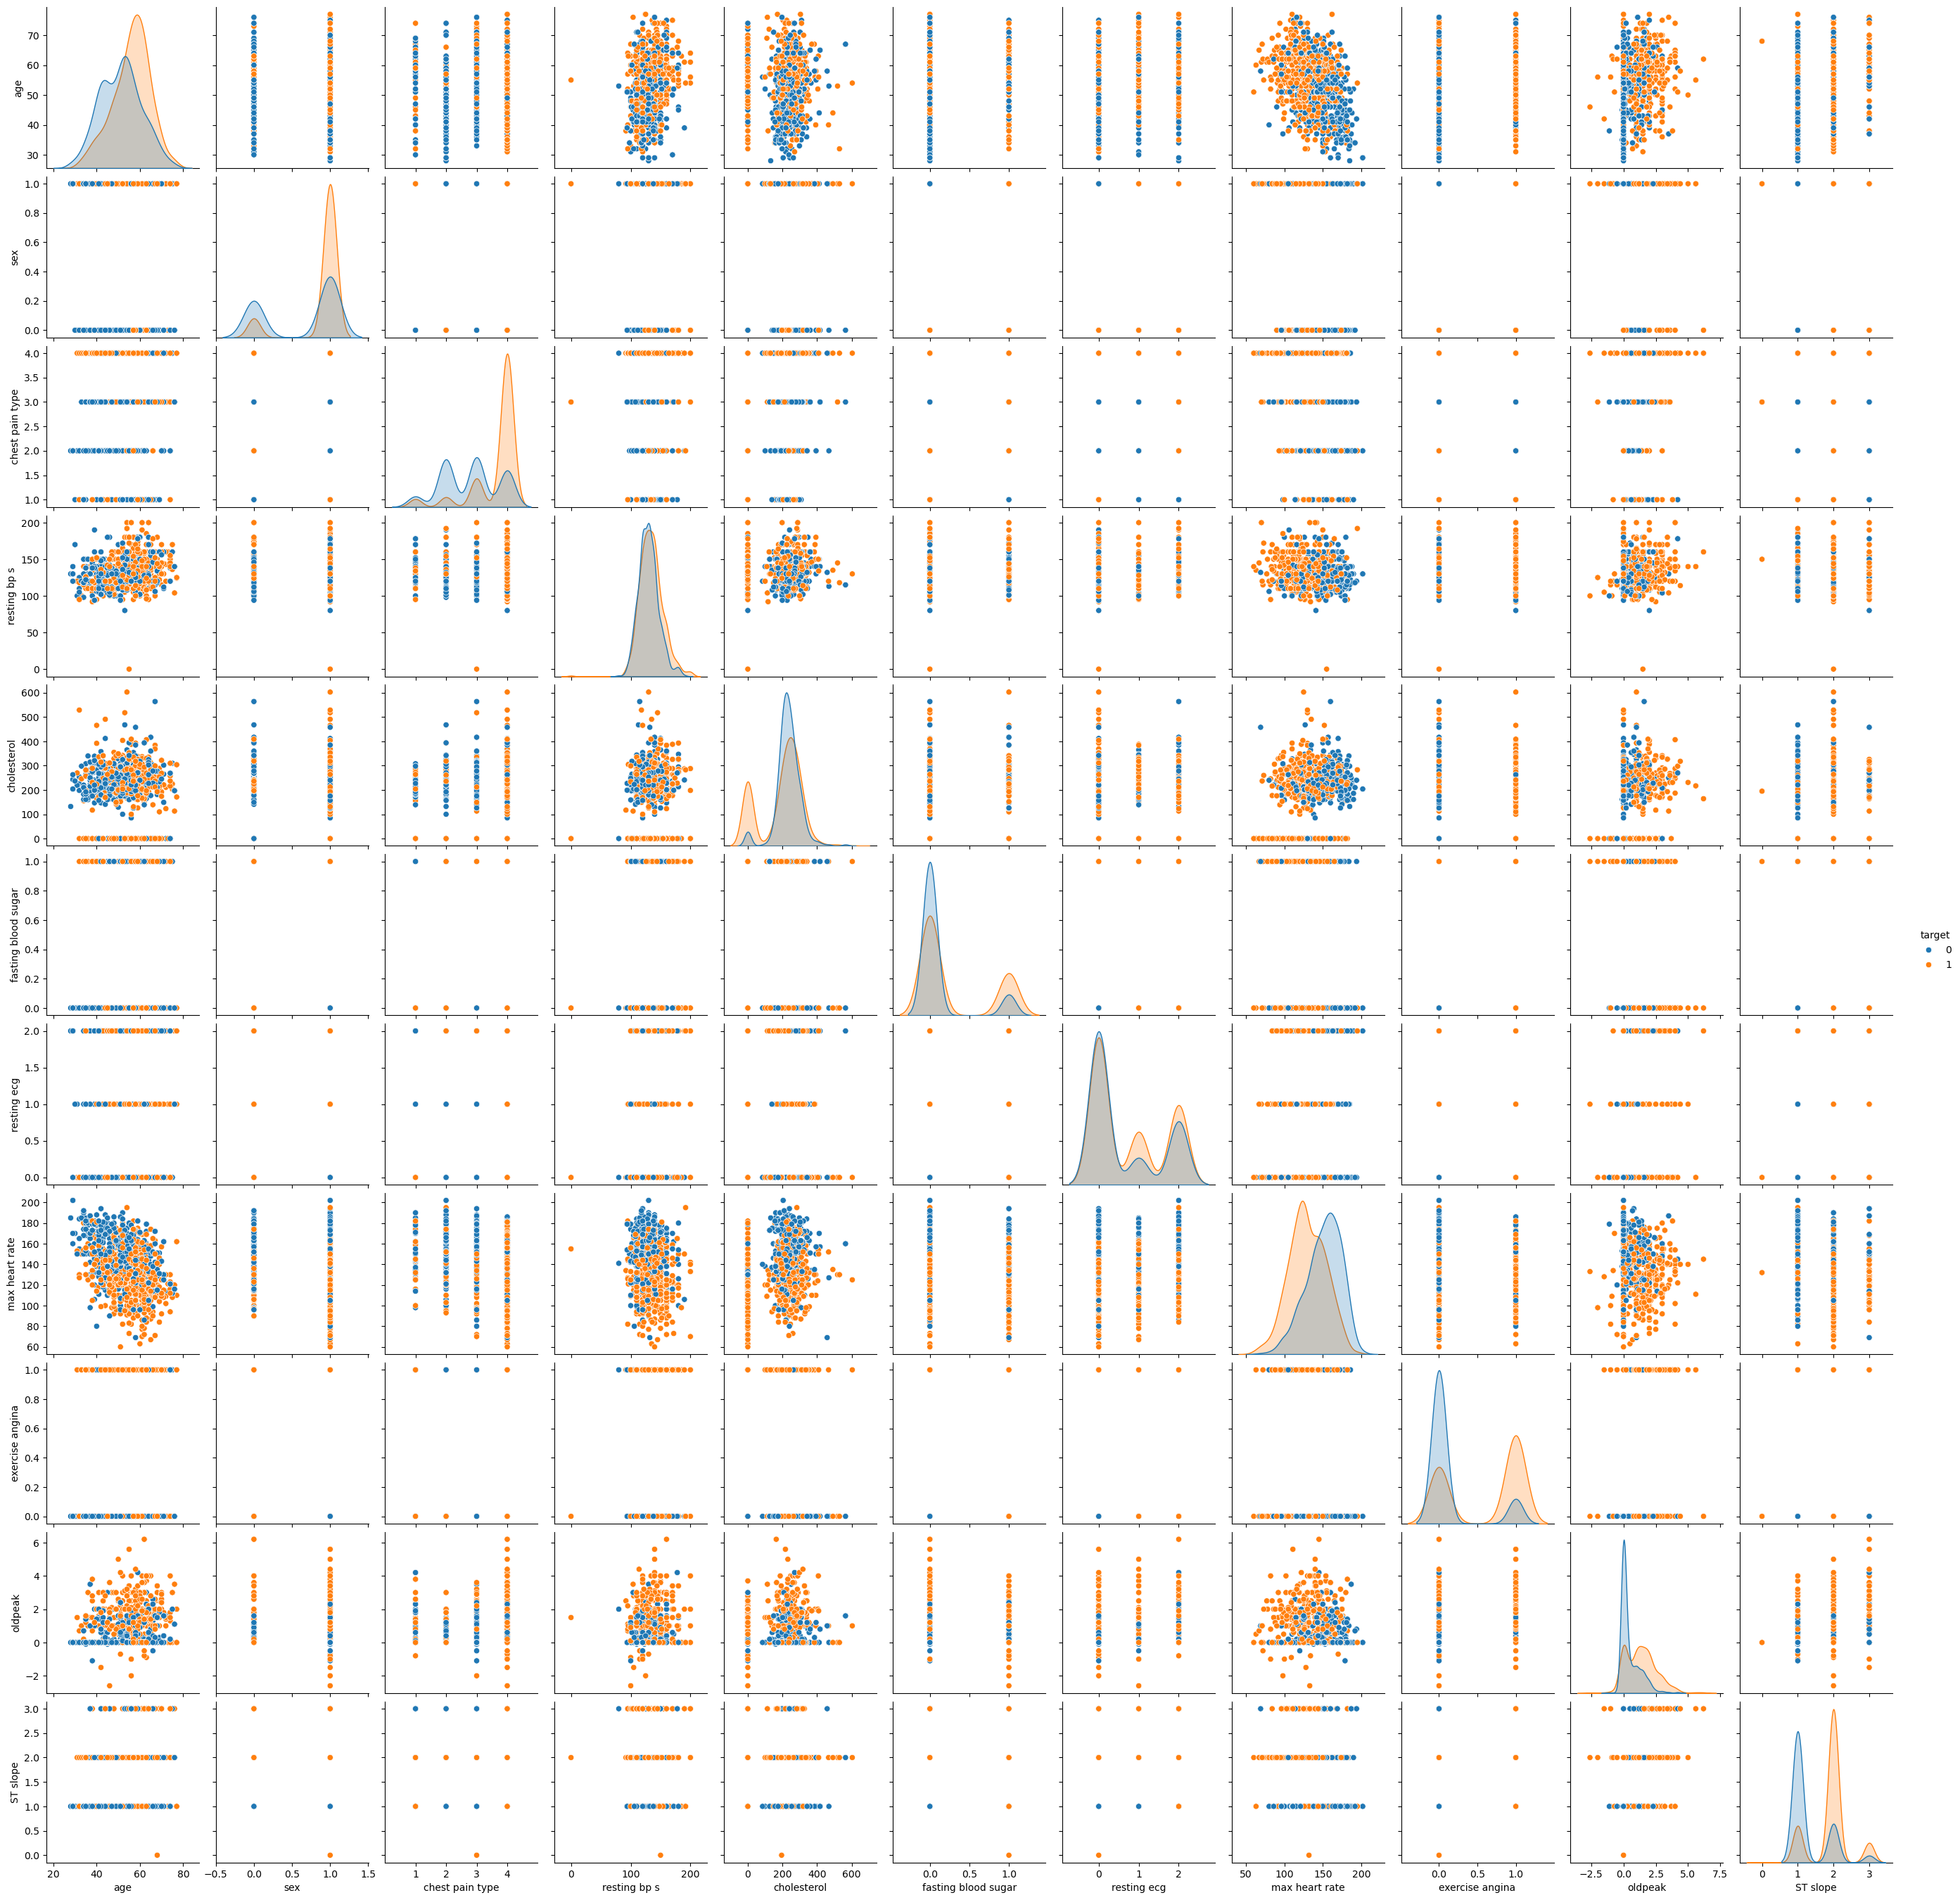

In [19]:
#Feature Relationships
#Pairplots to show relationships between features and target:

sns.pairplot(df, hue='target')
plt.show()


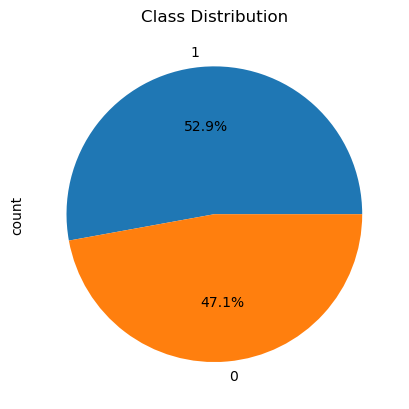

In [20]:
#Checking if heart disease vs normal
df['target'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()


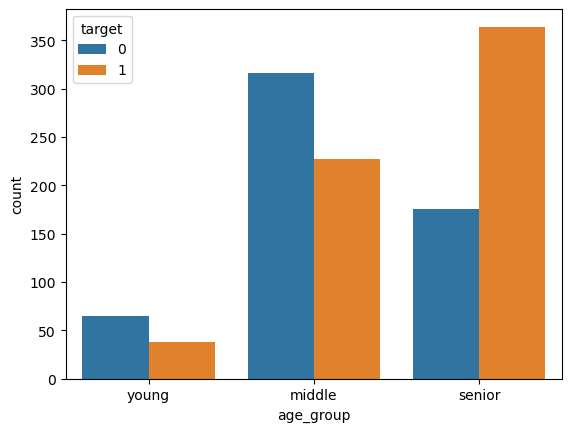

In [21]:
df['age_group'] = pd.cut(df['age'], bins=[29,40,55,80], labels=['young','middle','senior'])
sns.countplot(x='age_group', hue='target', data=df)
plt.show()


In [22]:
#testing t-tests or chi-square tests to show significant differences between classes
from scipy.stats import ttest_ind

healthy = df[df['target']==0]['cholesterol']
disease = df[df['target']==1]['cholesterol']

stat, p = ttest_ind(healthy, disease)
print("t-statistic:", stat, "p-value:", p)


t-statistic: 6.975789727171711 p-value: 5.039823224881067e-12
